# A2. Models of complex networks

### Implementation of models of complex networks.
Implement generators of complex networks for, at least, two of the following models of complex networks (sorted by increasing difficulty), which must include at least one of the two last ones (BA or CM):

- Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)

- Watts-Strogatz (WS) small-world model

- Barabási & Albert (BA) preferential attachment model

- Configuration Model (CM)

In [1]:
%pip install igraph -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Libraries
import igraph
import matplotlib.pyplot as plt
from collections import defaultdict
import numpy as np 
from typing import List
import numpy as np
import networkx as nx
import itertools

In [3]:
## PArams
from pylab import rcParams
rcParams['figure.figsize'] = 12,8

## 1. Erdös-Rényi (ER) networks, either G(N,K) or G(N,p)
ER: different values of "K" for G(N,K), or of "p" for G(N,p), such that e.g. k=3, 6, 10

In [4]:
## make a class for a Erdos-Renyi graph 
class ErdosRenyi:
    """
    PARAMS: 
    -------
    number_of_nodes : the total number of nodes in the graph 
    
    degrees : degrees (k), maximum degree per node 
    
    probabilities : the probability that will be assigned to each new node 
    
    RETRUNS:
    --------
    
    ER_graph : A randomly generated Erdös-Rényi Graph with the defined parameters above. 
    """
    def __init__(self, number_of_nodes:int, degrees:int, probabilities:float) -> dict:
        self.number_of_nodes = number_of_nodes
        self.degrees = degrees
        self.probabilities = probabilities
        self.max_avg_degree = 20
        self.ER_graph = self.generate_ER_graph()
    ## define the generate_ER_graph function
    def generate_ER_graph(self):
        ## instantiate an empty graph 
        g = nx.Graph()
        ## list of number of nodes 
        n_nodes = [i for i in range(self.number_of_nodes)]
        ## add the nodes to the graph 
        g.add_nodes_from(n_nodes)
        ## iterate through the nodes of the graph 
        for node, edges in itertools.combinations(g, 2):
            ## generate a random number between 0 and 1
            rand_num = np.random.uniform(0,1)
            ## if the random number is less than the probability, add an edge
            if rand_num < self.probabilities:
                ## get the current degree of the source node 
                src_degree = g.degree(node)
                ## get the degree of the destination node
                trgt_degree = g.degree(edges)
                ## if the src_degree and the trgt degree are less than self.degrees, add an edge
                if src_degree < self.degrees and trgt_degree < self.degrees:
                    ## if average degree of the network is less than 20 add an edge
                    avg_degree = np.mean([x for x in dict(nx.degree(g)).values()])
                    if avg_degree <= self.max_avg_degree:
                        g.add_edge(node, edges)
                        avg_degree = np.mean([x for x in dict(nx.degree(g)).values()])
        return g
    
    

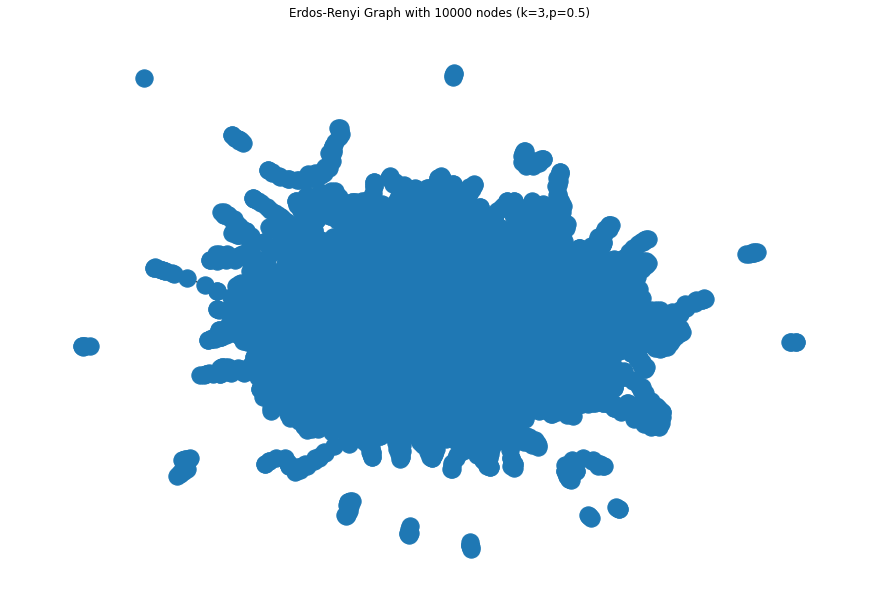

FileNotFoundError: [Errno 2] No such file or directory: './graphs/ER/10000/ER_graph_10000_3_50.npy'

In [5]:
node = 10000
probs = 0.5
k = 3
g = ErdosRenyi(node, k, probs).generate_ER_graph()
#nx.draw(g, with_labels=True)
degs = dict(nx.degree(g))
#_ = [print(f"Node: {i} has degree: {k}") for i,k in degs.items()]
nx.draw(g, pos=nx.spring_layout(g))
plt.title(f"Erdos-Renyi Graph with {node} nodes (k={k},p={probs})")
#plt.hist(degs.values(), bins=range(0, max(degs.values())+1));plt.show()
plt.savefig(f"./graph_imgs/ER_graph_{node}_{k}_{round(probs*100)}.png")
plt.show()
output = nx.to_numpy_matrix(g)
np.save(f"./graphs/ER/{node}/ER_graph_{node}_{k}_{round(probs*100)}.npy", output)

In [ ]:
## generate the plots and the matrix files to deliver 
nodes = 100
proba = 0.2
k = 3 ## fix this 
for node in [50, 100, 1000, 10000]:
    for probs in [0.1, 0.25, 0.5, 0.75, 0.9]:
        ## build it 
        g = ErdosRenyi(node, k, probs).generate_ER_graph()
        #nx.draw(g, with_labels=True)
        degs = dict(nx.degree(g))
        #_ = [print(f"Node: {i} has degree: {k}") for i,k in degs.items()]
        nx.draw(g, pos=nx.spring_layout(g))
        plt.title(f"Erdos-Renyi Graph with {node} nodes (k={k},p={probs})")
        #plt.hist(degs.values(), bins=range(0, max(degs.values())+1));plt.show()
        plt.savefig(f"./graph_imgs/ER_graph_{node}_{k}_{round(probs*100)}.png")
        plt.show()
        output = nx.to_numpy_matrix(g)
        np.save(f"./graphs/ER/{node}/ER_graph_{node}_{k}_{round(probs*100)}.npy", output)
        

In [ ]:
from scipy.special import comb
## theoretical number of edges 
## G(np) is nC2 * p 
theo_edges = comb(nodes, 2) * proba
actual_edges = g.number_of_edges()
## display theo_edges and actual_edges and their difference 
print(f"Theoretical number of edges: {theo_edges}")
print(f"Actual number of edges: {actual_edges}")
print(f"Difference: {actual_edges - theo_edges}")
## properties of the graph

## theoretical & experimental average degree 
theo_avg_degree = 2*theo_edges / nodes
actual_avg_degree = 2*actual_edges / nodes
print(f"Theoretical average degree: {theo_avg_degree}")
print(f"Actual average degree: {actual_avg_degree}")
print(f"Difference: {actual_avg_degree - theo_avg_degree:.2f}")

## theoretical and experimental degree distribution
f = lambda k: comb(nodes-1, k)*proba**k*(1-proba)**(nodes-1-k)
theo_dist = list(map(f, range(1,k+1)))
plt.plot(theo_dist)
## actual distribution 


Theoretical number of edges: 49.5
Actual number of edges: 44
Difference: -5.5
Theoretical average degree: 0.99
Actual average degree: 0.88
Difference: -0.11


0.05976685942758052

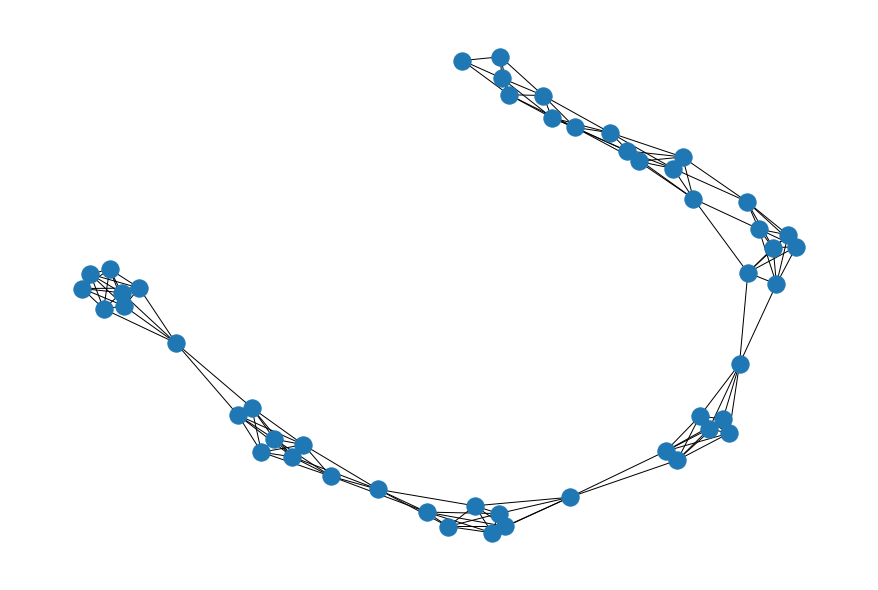

In [ ]:
## NODES
N = 50
NODES = list(range(N))
## EDGES
EDGES = list(itertools.combinations(NODES, 2))
## NUMBER OF EDGES PER NODE 
NUM_EDGES = 6
## MAXIMUM DEGREE EDGES IN THE NETWORK 
MAX_DEGREE = 20 
## define a graph 
GRAPH = defaultdict(list)
## probability of new edge 
EDGE_PROBABILITY = 0.1

### --- working --- ###
## add the nodes to the dictionary 
#GRAPH = {node:[] for node in NODES}
## iterate through the edges 
for edge in EDGES:
    ## get the current degree of the node 
    curr_degree = len(GRAPH[edge[0]])
    ## get the average degree of the network
    avg_degree = np.mean([len(x) for x in GRAPH.values()])
    ## the current degree has to be less than NUM_EDGES and the average degree has to be less than MAX_DEGREE
    ## then if a random number is greater than EDGE_PROBABILITY, add an edge
    if curr_degree != NUM_EDGES and avg_degree <= MAX_DEGREE:
        if np.random.uniform(0,1) > EDGE_PROBABILITY:
            GRAPH[edge[0]].append(edge[1])
            GRAPH[edge[1]].append(edge[0])
## get a list of edges 
edges = [(node, edge) for node in GRAPH.keys() for edge in GRAPH[node]]
## convert it to an nx graph with edges passed to it 
gnx = nx.Graph(edges)
## plot it 
nx.draw(gnx,pos=nx.spring_layout(gnx))

## 3. Barabási & Albert (BA) preferential attachment model
BA: different values of "m" (number of edges that each new nodes forms with the existing nodes), e.g. m=1, 2, 5

In [ ]:
nodes = 20
p = 0.2
k = np.random.uniform(size=(nodes,nodes))
kk = (k > p).astype(int)
G = nx.from_numpy_matrix(kk)

In [ ]:
import matplotlib.colors as mcolors
## this shit works
def centrality(graph, centr_type, title):
    """This function creates a represntation for a given centrality type and for a given graph.
    graph : networkx graph object
    centr_type : type of centrality on a given graph, for example : nx.degree_centrality(graph)
    title : string for the title of the representation.
    """

    plt.figure(dpi=150)
    pos = nx.spring_layout(graph)
    nodes = nx.draw_networkx_nodes(
        graph,
        pos,
        node_size=250,
        cmap=plt.cm.plasma,
        node_color=list(centr_type.values()
                        ),  # color nodes according to their centrality values
        nodelist=list(centr_type.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))

    labels = nx.draw_networkx_labels(graph, pos)
    edges = nx.draw_networkx_edges(graph, pos)

    plt.title(title)
    plt.colorbar(nodes)
    plt.axis('off')

In [ ]:
rcParams['figure.figsize'] = 20,12
degrees = nx.degree_centrality(G)
eigen_centr = nx.eigenvector_centrality(G)
betweenees = nx.betweenness_centrality(G)
centrality(G, degrees, "Some title")

In [ ]:
"""
1. Generamos un grafo con N nodos 
2. Elegimos nodo a cual agregar nuevo nodo (degree y probabilidad)
3. agregamos nodo 
repetir 2-3 hasta llegar al tamanio querido 
----------------------------------------------------------
INPUT: 
    - m (degree per node)
    - Numero de nodos final
OUTPUT:
    - Network con numero de nodos y degree deseado 
----------------------------------------------------------
Ejemplo: 
m = 3 (m>1)
para cada nodo, repetimos paso 2, 3 veces, para tener 3 conexiones. 
y se actualiza todo para cada nuevo edge / conexion que se hace. 
"""


def BA_lbert(nodes):
    adjacency_matrix = np.random.randint(10, size=(nodes,nodes))
    np.fill_diagonal(adjacency_matrix, 0)
    network = nx.from_numpy_matrix(adjacency_matrix)
    #network = network.remove_edges_from(nx.selfloop_edges(network))
    nx.draw(network,with_labels=True)
    plt.title("Barabási-Albert")
    plt.show()
    
    
    return network, adjacency_matrix


def degrees_sum(graph:nx.graph.Graph) -> None:
    """returns the list of degrees and the sum of degrees"""
    ## degrees 
    degrees = np.array([x for x in dict(graph.degree()).values()])
    ## sum of degrees 
    sum_degrees = sum(degrees)
    return degrees, sum_degrees

def generate_degree_bin(degrees:np.array) -> np.array:
    """returns the binning of the degrees"""
    return np.cumsum(degrees)

def degree_sum_uniform(sum_of_degrees:int) -> float:
    """generates a random uniform value multiplied by the sum of degrees"""
    ## generate a random value 
    rand_val = np.random.uniform(0,1)
    ## return the sum of degrees * rand_val
    return sum_of_degrees * rand_val

def get_bin_index(random_value:float, bin_values:np.array) -> tuple:
    """Returns the start and end index of the bin the value corresponds"""
    ## iterate over the list with the index 
    for idx, i in enumerate(bin_values):
        ## condition 
        if random_value <= i:
            ## if the value of the index is less than 0 return 0
            start = idx-1 if (idx-1) >=0 else 0
            return (start, idx)

## update node to add 
def update_node_to_add(dic1,matrix):
    # Compute the degree with the matrix
    for i in range(0,len(matrix)):
        degree_for_node = matrix[i,:]
        dic1 = sum((degree_for_node > 0).astype(int))
        print(dic1)

    dic1 = degrees

    return dic1



    



In [ ]:
    
#PLotear inicial
k,adjacency_M = BA_lbert(4)
#Calcular degrees y sacar dictionary

degrees, sum_degree = degrees_sum(adjacency_M) # degrees and their sum 
degree_bin = generate_degree_bin(degrees) ## bins of the degrees 
degree_random = degree_sum_uniform(sum_degree) ## random value * sum of degrees
val_bin = get_bin_index(degree_random, degree_bin)

In [ ]:
#Experiment to print the graph with directed and undirectd way

nodes = 6
adjacency_matrix = np.random.randint(low=0,high=2, size=(nodes,nodes))
np.fill_diagonal(adjacency_matrix, 0)
test = np.triu(adjacency_matrix)
graph = nx.from_numpy_array(test)
graph1 = nx.from_numpy_array(adjacency_matrix)
#print(dict(graph.degree()).values())
#np.fill_diagonal(adjacency_matrix, 0)
#assert sum(adjacency_matrix.diagonal()) == 0
nx.draw(graph,with_labels=True)
plt.title("Only diagonal")
plt.show()
nx.draw(graph1,with_labels=True)
plt.title("Adjacency Matrix")
plt.show()
def get_degree(x):
    a = dict(x.degree()).values()
    counter = [x for x in a]
    return counter

d1 = get_degree(graph)
print(sum(d1)/len(d1))
d2 = get_degree(graph1)
print(sum(d2)/len(d2))


In [ ]:
b = np.random.randint(3,size=(3,3))
a[:b.shape[0],:b.shape[1]] = b
print(b)
print(a)

In [ ]:
adjacency_matrix
np.triu(adjacency_matrix)

In [ ]:
dict(G.degree()).values()

In [ ]:
type(G)

In [ ]:
##
#dict = {}       # Degree dictionary

def degrees_sum(graph:nx.graph.Graph) -> None:
    """returns the list of degrees and the sum of degrees"""
    ## degrees 
    degrees = np.array([x for x in dict(graph.degree()).values()])
    ## sum of degrees 
    sum_degrees = sum(degrees)
    return degrees, sum_degrees

def generate_degree_bin(degrees:np.array) -> np.array:
    """returns the binning of the degrees"""
    return np.cumsum(degrees)

def degree_sum_uniform(sum_of_degrees:int) -> float:
    """generates a random uniform value multiplied by the sum of degrees"""
    ## generate a random value 
    rand_val = np.random.uniform(0,1)
    ## return the sum of degrees * rand_val
    return sum_of_degrees * rand_val

def get_bin_index(random_value:float, bin_values:np.array) -> tuple:
    """Returns the start and end index of the bin the value corresponds"""
    ## iterate over the list with the index 
    for idx, i in enumerate(bin_values):
        ## condition 
        if random_value <= i:
            ## if the value of the index is less than 0 return 0
            start = idx-1 if (idx-1) >=0 else 0
            return (start, idx)

## update node to add 
def update_node_to_add(dict,bin_index):
    
    pass






In [ ]:
degrees, sum_degree = degrees_sum(G) # degrees and their sum 
degree_bin = generate_degree_bin(degrees) ## bins of the degrees 
degree_random = degree_sum_uniform(sum_degree) ## random value * sum of degrees
val_bin = get_bin_index(degree_random, degree_bin)

In [ ]:
degrees, sum_degree

In [ ]:
degree_bin, degree_random

In [ ]:
val_bin

In [ ]:

d = {"1":1,"2": 5,"3": 4,"4": 5}

nuevo = update_node_to_add(d,adjacency_matrix)


In [ ]:
print(nuevo)